# STS test


In [1]:
# import seabreeze (use 'pyseabreeze')
import seabreeze.spectrometers as sb

import os
import math
import numpy as np
import matplotlib.pyplot as plt
import time

# set graphics to be plotted in the notebook
%matplotlib inline 

devices = sb.list_devices()
print (devices)

[<SeaBreezeDevice STS:S03615>]


In [2]:
sb.list_devices()

[<SeaBreezeDevice STS:S03615>]

In [3]:
#spec = sb.Spectrometer(devices[0])#universal
#spec = sb.Spectrometer.from_serial_number("USB2+F02461")#usb 2000
spec = sb.Spectrometer.from_serial_number("S03615")#STS-UV-L-100-400-SMA

In [4]:
# serial number
print (spec.serial_number)
# model
print (spec.model)
# number of pixels (as returned by seabreeze)
print (spec.pixels)
# set the integration time in microseconds
spec.integration_time_micros(400000)
time.sleep(2)
# return an array containing all wavelengths
#wavelengths=spec.wavelengths()
# return the newest aquired spectrum (with dark count and nonlinearity correction)
#intensities=spec.intensities(correct_dark_counts=True, correct_nonlinearity=True)

S03615
STS
1024


In [24]:
#set integration time
micro_time=0.01*1e6 # us
spec.integration_time_micros(micro_time)

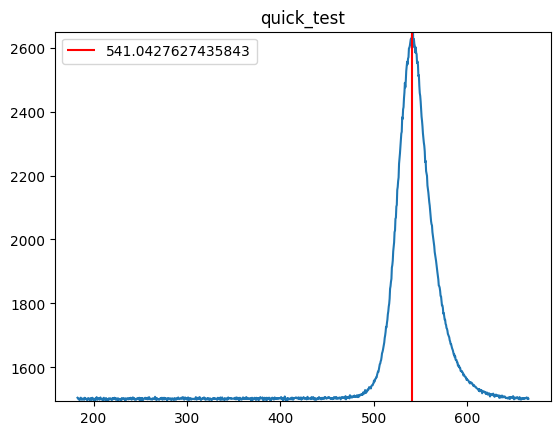

In [53]:
nm,ints = spec.spectrum()
plt.plot(nm,ints)
plt.vlines(nm[np.argmax(ints)],np.min(ints),np.max(ints),color='r',label=nm[np.argmax(ints)])
plt.title('quick_test'.format(micro_time/1e3))
plt.ylim(np.min(ints),np.max(ints))
plt.legend()

In [54]:
print(nm[np.argmax(ints)])

541.0427627435843


### reliable readout over 10 measurements

In [32]:
blue_490nm_10ms=[]
for ii in range(10):
    _,ints = spec.spectrum()
    blue_490nm_10ms.append(ints)
    time.sleep(2)
blue_490nm_10ms=np.asarray(blue_490nm_10ms)
mean_blue_490nm_10ms=np.mean(blue_490nm_10ms,axis=0)

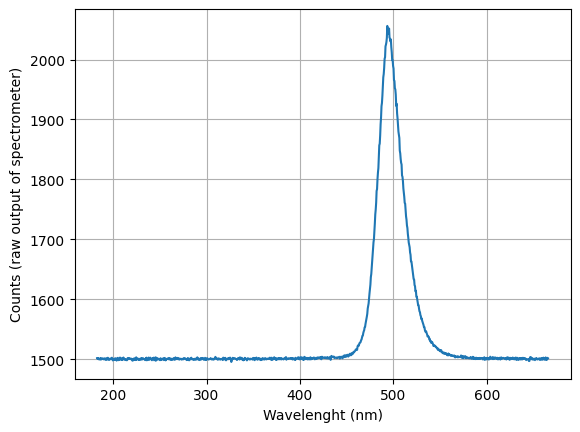

In [33]:
plt.plot(nm,mean_blue_490nm_10ms)
plt.xlabel ("Wavelenght (nm)")
plt.ylabel("Counts (raw output of spectrometer)")
plt.grid()

In [34]:
print(nm[np.argmax(mean_blue_490nm_10ms)])

493.54121764948957


## produce the dark noise

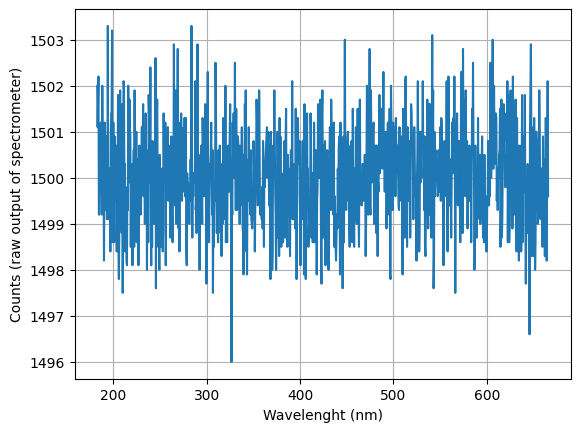

In [36]:
#get dark noise
dark_10ms=[]
for ii in range(10):
    _,dark = spec.spectrum()
    dark_10ms.append(dark)
    time.sleep(2)
dark_10ms=np.asarray(dark_10ms)
mean_dark_10ms=np.mean(dark_10ms,axis=0)
plt.plot(nm,mean_dark_10ms)
plt.xlabel ("Wavelenght (nm)")
plt.ylabel("Counts (raw output of spectrometer)")
plt.grid()

## remove the dark noise, pure blue

Text(0.5, 1.0, '490_nm_STS_no_dark_noise')

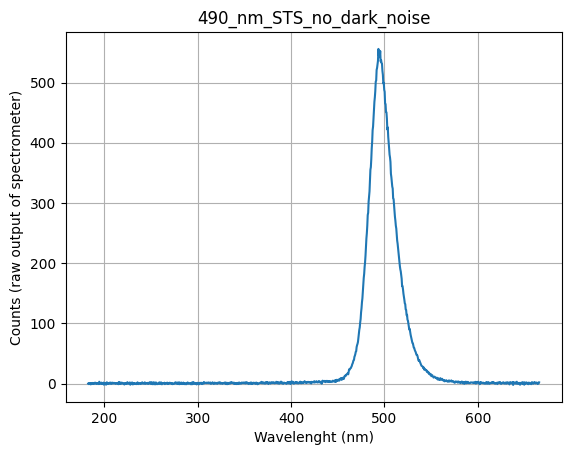

In [39]:
pure_blue_490nm_10ms = mean_blue_490nm_10ms-mean_dark_10ms
plt.plot(nm,pure_blue_490nm_10ms)
plt.xlabel ("Wavelenght (nm)")
plt.ylabel("Counts (raw output of spectrometer)")
plt.grid()
plt.title('490_nm_STS_no_dark_noise')

In [38]:
print(nm[np.argmax(pure_blue_490nm_10ms)])

493.54121764948957


## LED 545 nm

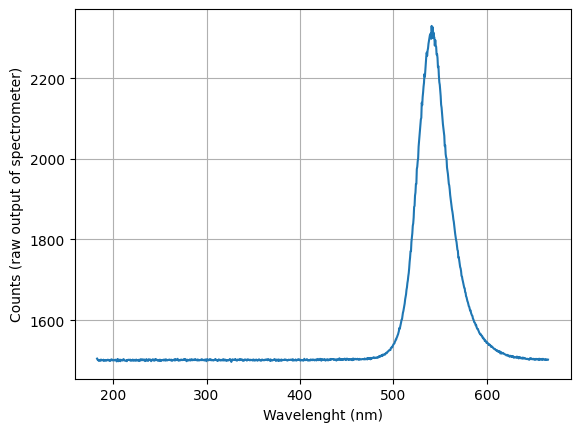

In [56]:
green_545_10ms=[]
for ii in range(10):
    _,ints = spec.spectrum()
    green_545_10ms.append(ints)
    time.sleep(2)
green_545_10ms=np.asarray(green_545_10ms)
mean_green_545_10ms=np.mean(green_545_10ms,axis=0)
plt.plot(nm,mean_green_545_10ms)
plt.xlabel ("Wavelenght (nm)")
plt.ylabel("Counts (raw output of spectrometer)")
plt.grid()

### Turn of LED

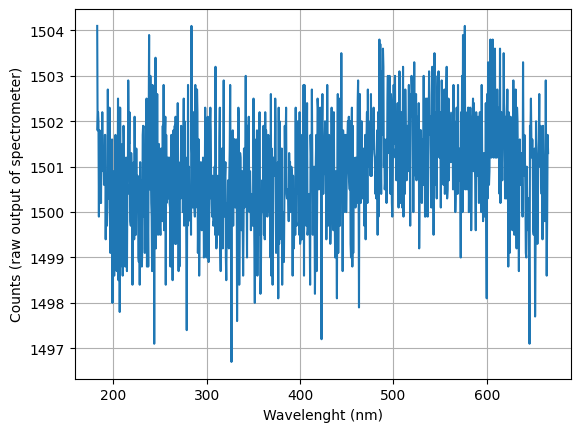

In [57]:
#get dark noise
dark_10ms=[]
for ii in range(10):
    _,dark = spec.spectrum()
    dark_10ms.append(dark)
    time.sleep(2)
dark_10ms=np.asarray(dark_10ms)
mean_dark_10ms=np.mean(dark_10ms,axis=0)
plt.plot(nm,mean_dark_10ms)
plt.xlabel ("Wavelenght (nm)")
plt.ylabel("Counts (raw output of spectrometer)")
plt.grid()

### final result

Text(0.5, 1.0, '545_nm_STS_no_dark_noise')

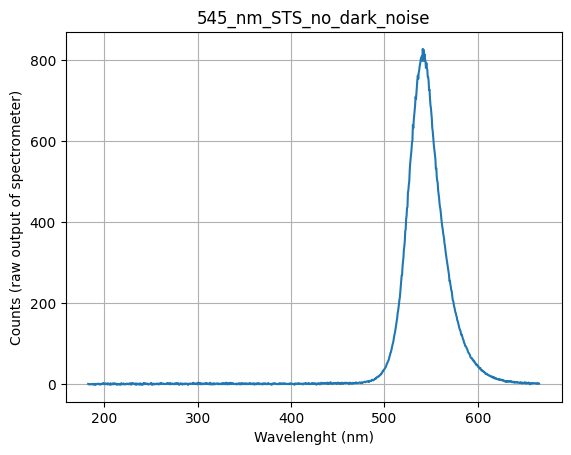

In [58]:
pure_green_545_10ms = mean_green_545_10ms-mean_dark_10ms
plt.plot(nm,pure_green_545_10ms)
plt.xlabel ("Wavelenght (nm)")
plt.ylabel("Counts (raw output of spectrometer)")
plt.grid()
plt.title('545_nm_STS_no_dark_noise')

In [64]:
print(nm[np.argmax(pure_green_545_10ms)])

541.0427627435843
